<a href="https://colab.research.google.com/github/IbrahimHammed/MachineLearning/blob/main/LinearRegressionExample002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/IbrahimHammed/MachineLearning/blob/main/Advertising_2023.csv?raw=true'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,digital,TV,radio,newspaper,sales
0,1,345.15,156.0,37.8,69.2,22.1
1,2,66.75,46.0,39.3,45.1,10.4
2,3,25.80,18.3,45.9,69.3,9.3
3,4,227.25,145.1,41.3,58.5,18.5
4,5,271.20,165.2,10.8,58.4,12.9


In [4]:
selectedFeatures = ['digital', 'TV', 'radio', 'newspaper', 'sales']
df = df[selectedFeatures]
df.head()

,digital,TV,radio,newspaper,sales
0,345.15,156.0,37.8,69.2,22.1
1,66.75,46.0,39.3,45.1,10.4
2,25.80,18.3,45.9,69.3,9.3
3,227.25,145.1,41.3,58.5,18.5
4,271.20,165.2,10.8,58.4,12.9


In [5]:
df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

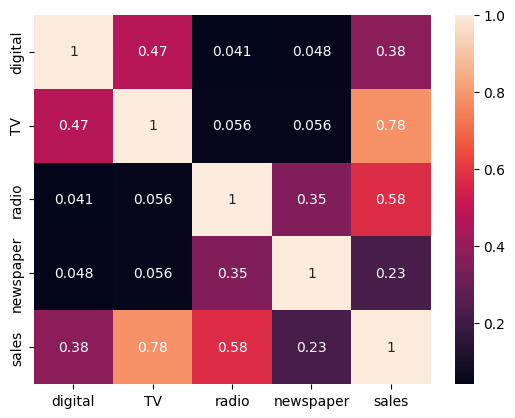

In [6]:
sns.heatmap(df.corr(), annot=True)

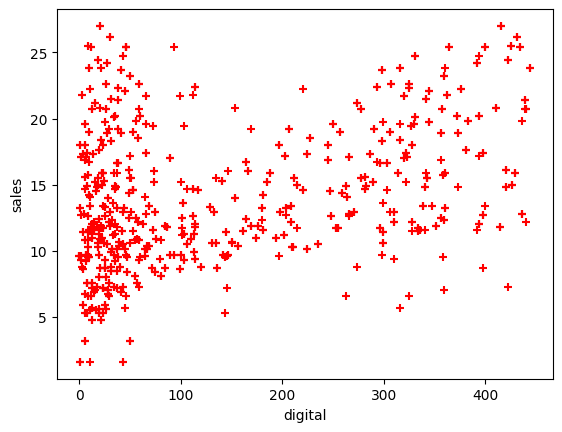

In [7]:
%matplotlib inline
plt.xlabel('digital')
plt.ylabel('sales')
plt.scatter(df.digital,df.sales,color='red',marker='+')

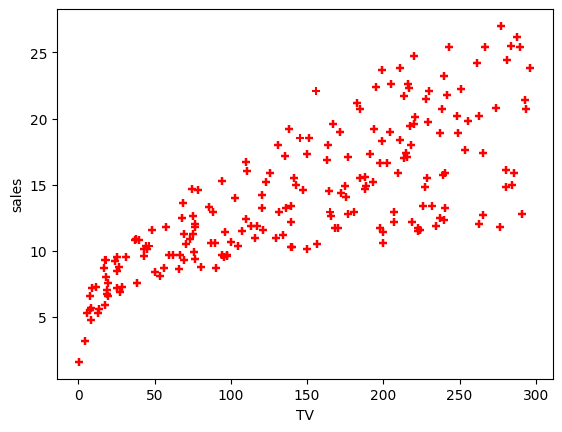

In [8]:
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('sales')
plt.scatter(df.TV,df.sales,color='red',marker='+')

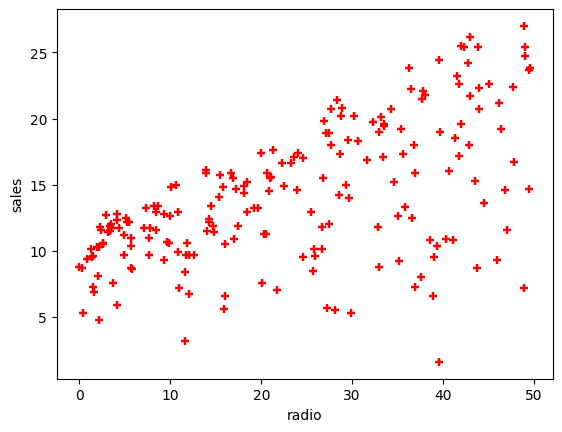

In [9]:
%matplotlib inline
plt.xlabel('radio')
plt.ylabel('sales')
plt.scatter(df.radio,df.sales,color='red',marker='+')

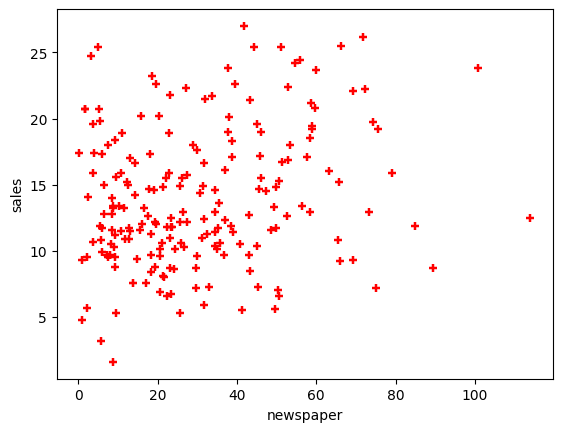

In [10]:
%matplotlib inline
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.scatter(df.newspaper,df.sales,color='red',marker='+')

In [11]:
x = df.drop('sales', axis='columns')
x.head()

,digital,TV,radio,newspaper
0,345.15,156.0,37.8,69.2
1,66.75,46.0,39.3,45.1
2,25.80,18.3,45.9,69.3
3,227.25,145.1,41.3,58.5
4,271.20,165.2,10.8,58.4


In [12]:
y = df['sales']
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [13]:
target = ['sales']
predictors = ['digital', 'TV', 'radio', 'newspaper']

x = df[predictors].values
y = df[target].values

In [14]:
# Data Standardization
from sklearn.preprocessing import StandardScaler
predictorScaler = StandardScaler()
targetScaler = StandardScaler()

In [15]:
predictorScalerFit = predictorScaler.fit(x)
targetScalerFit = targetScaler.fit(y)

In [16]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
# Quick sanity check with the shapes of Training and testing datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(839, 4)
(839, 1)
(360, 4)
(360, 1)


In [18]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=64, input_dim=4, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
# Fitting the ANN to the Training set
model.fit(x_train, y_train ,batch_size = 20, epochs = 300, verbose=1)

Epoch 1/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 195.5085
Epoch 2/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161.7461
Epoch 3/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126.8222
Epoch 4/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.7256
Epoch 5/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.8706
Epoch 6/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74.6536
Epoch 7/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.8918
Epoch 8/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.4267
Epoch 9/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.8132
Epoch 10/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.4137
Epoch 11/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.7736
Epoch 12/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.9766
Epoch 13/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6551
Epoch 14/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3639
Epoch 15/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [43]:
# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1660 
Test Loss: 0.17479750514030457


In [44]:
# Make predictions
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [45]:
predictions

array([[12.219713 ],
       [17.824846 ],
       [23.44228  ],
       [21.072754 ],
       [23.33432  ],
       [22.083637 ],
       [15.231002 ],
       [12.144892 ],
       [16.997692 ],
       [17.29345  ],
       [10.307096 ],
       [ 8.343336 ],
       [ 9.925344 ],
       [15.386725 ],
       [16.442686 ],
       [ 8.978933 ],
       [15.231002 ],
       [11.949882 ],
       [16.067032 ],
       [15.912122 ],
       [10.640946 ],
       [11.369717 ],
       [ 7.093317 ],
       [11.330324 ],
       [18.923779 ],
       [14.212344 ],
       [14.337845 ],
       [ 8.978933 ],
       [ 7.6260877],
       [24.615555 ],
       [10.828286 ],
       [19.877516 ],
       [19.813093 ],
       [ 8.496646 ],
       [15.1210375],
       [10.020371 ],
       [16.141075 ],
       [18.166527 ],
       [ 6.958133 ],
       [21.986    ],
       [ 6.6451545],
       [ 9.300633 ],
       [12.644579 ],
       [ 3.1775868],
       [ 7.093317 ],
       [19.593405 ],
       [15.580146 ],
       [15.91

In [46]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17479748919655197


In [47]:
# Compare with Linear Regression model
from sklearn.linear_model import LinearRegression

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [48]:
# Predict and evaluate
y_lr_pred = lr_model.predict(x_test)

In [49]:
# Evaluate
lr_mse = mean_squared_error(y_test, y_lr_pred)
print(f'Linear Regression Mean Squared Error: {lr_mse}')


Linear Regression Mean Squared Error: 2.5899246594595717
